In [60]:
#Importamos las funciones necesarias para cargar los datos del vino y realizar un resumen de las clases. También importamos las bibliotecas necesarias para la selección de características y visualización de datos.
import sys
sys.path.append("../src")

from functions import load_wine_data, class_summary
from sklearn.feature_selection import f_classif
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [61]:
df = load_wine_data("../data/wine.data")

df.head()

,class,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [62]:
df["class"].value_counts()

class
1    71
0    59
2    48
Name: count, dtype: int64

Las tres clases están relativamente balanceadas, lo que favorece un entrenamiento estable del modelo sin necesidad de técnicas de balanceo.

In [63]:
#Calculamos la media de cada variable química por clase para identificar los rasgos distintivos de cada tipo de vino.
class_means = df.groupby("class").mean()
class_means

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315,proline
class,,,,,,,,,,,,,
0,13.744746,2.010678,2.455593,17.037288,106.338983,2.840169,2.982373,0.290000,1.899322,5.528305,1.062034,3.157797,1115.711864
1,12.278732,1.932676,2.244789,20.238028,94.549296,2.258873,2.080845,0.363662,1.630282,3.086620,1.056282,2.785352,519.507042
2,13.153750,3.333750,2.437083,21.416667,99.312500,1.678750,0.781458,0.447500,1.153542,7.396250,0.682708,1.683542,629.895833


In [64]:
class_means.T

class,0,1,2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [65]:
#Calculamos las variables que más discriminan entre las clases utilizando ANOVA (Análisis de Varianza) para identificar las características químicas que tienen la mayor diferencia entre las clases de vino.

X = df.drop("class", axis=1)
y = df["class"]

f_values, p_values = f_classif(X, y)

anova_results = pd.DataFrame({
    "feature": X.columns,
    "F_score": f_values,
    "p_value": p_values
}).sort_values(by="F_score", ascending=False)

anova_results

,feature,F_score,p_value
6,flavanoids,233.925873,3.598586e-50
12,proline,207.920374,5.783168e-47
11,od280_od315,189.972321,1.393105e-44
0,alcohol,135.077624,3.319504e-36
9,color_intensity,120.664018,1.162008e-33
10,hue,101.316795,5.917662e-30
5,total_phenols,93.733010,2.137670e-28
1,malic_acid,36.943425,4.127229e-14
3,alcalinity_of_ash,35.771637,9.444473e-14
8,proanthocyanins,30.271383,5.125359e-12


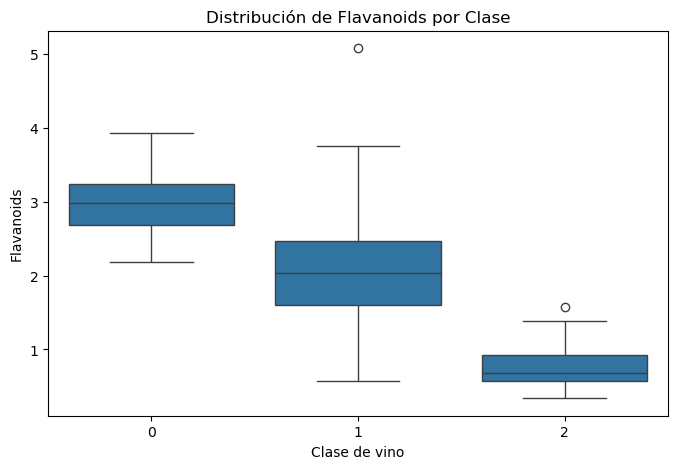

In [66]:

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="class", y="flavanoids")
plt.title("Distribución de Flavanoids por Clase")
plt.xlabel("Clase de vino")
plt.ylabel("Flavanoids")
plt.show()

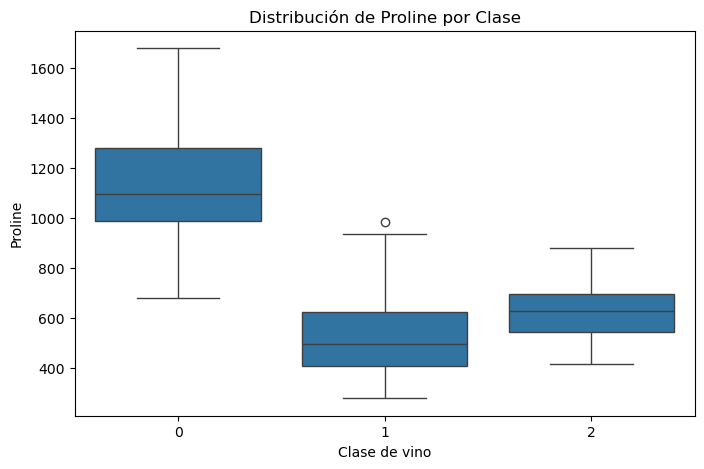

In [67]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="class", y="proline")
plt.title("Distribución de Proline por Clase")
plt.xlabel("Clase de vino")
plt.ylabel("Proline")
plt.show()

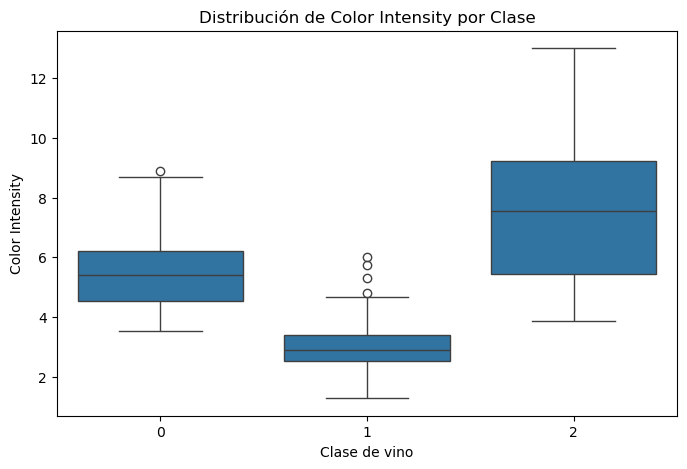

In [68]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="class", y="color_intensity")
plt.title("Distribución de Color Intensity por Clase")
plt.xlabel("Clase de vino")
plt.ylabel("Color Intensity")
plt.show()

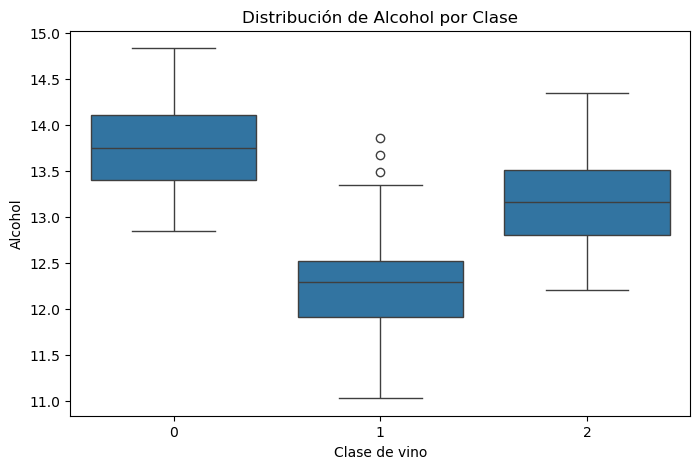

In [69]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="class", y="alcohol")

plt.title("Distribución de Alcohol por Clase")
plt.xlabel("Clase de vino")
plt.ylabel("Alcohol")
plt.show()

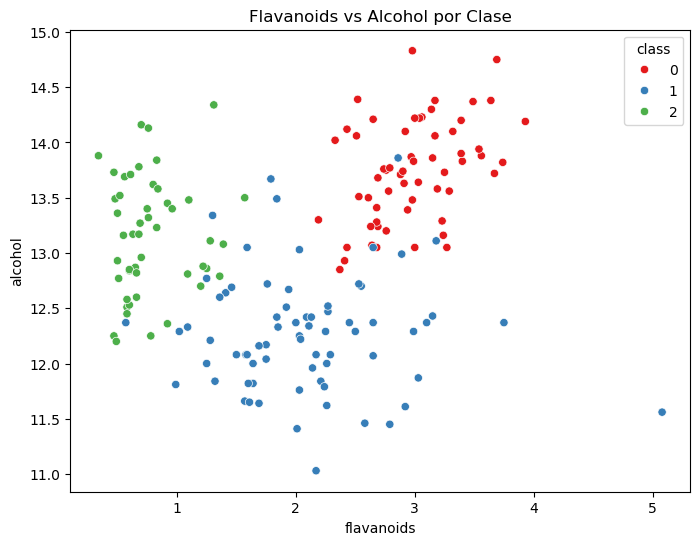

In [70]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="flavanoids",
    y="alcohol",
    hue="class",
    palette="Set1"
)

plt.title("Flavanoids vs Alcohol por Clase")
plt.show()

F_score alto → mayor capacidad de separación entre clases

p_value bajo → diferencia estadísticamente significativa

In [71]:
#Estandarizamos las características para que tengan media 0 y desviación estándar 1, lo que es importante para muchos algoritmos de machine learning.

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(
    data=X_pca,
    columns=["PC1", "PC2"]
)

pca_df["class"] = y.values

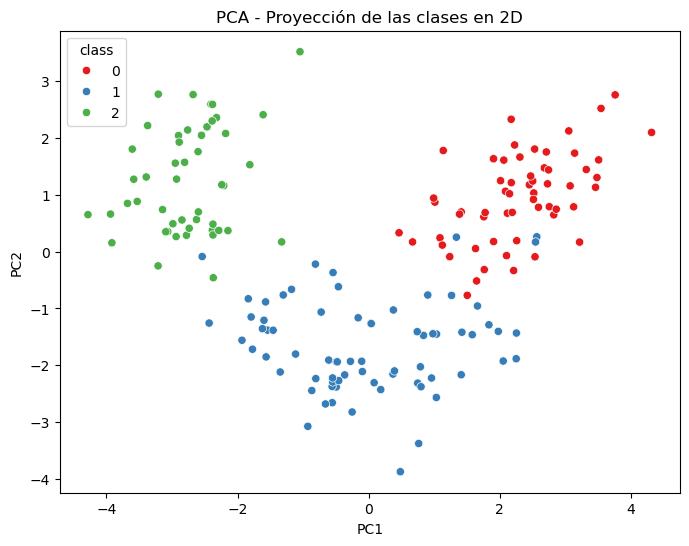

In [73]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x="PC1",
    y="PC2",
    hue="class",
    palette="Set1"
)

plt.title("PCA - Proyección de las clases en 2D")
plt.show()

In [74]:
print("Varianza explicada:", pca.explained_variance_ratio_)
print("Varianza acumulada:", sum(pca.explained_variance_ratio_))

Varianza explicada: [0.36198848 0.1920749 ]
Varianza acumulada: 0.5540633835693527


In [80]:
summary_full = (
    df.groupby("class")[["flavanoids", "proline", "alcohol", "color_intensity"]]
      .agg(["mean", "std"])
      .round(2)
)

summary_full

flavanoids        proline         alcohol       color_intensity      
            mean   std     mean     std    mean   std            mean   std
class                                                                      
0           2.98  0.40  1115.71  221.52   13.74  0.46            5.53  1.24
1           2.08  0.71   519.51  157.21   12.28  0.54            3.09  0.92
2           0.78  0.29   629.90  115.10   13.15  0.53            7.40  2.31

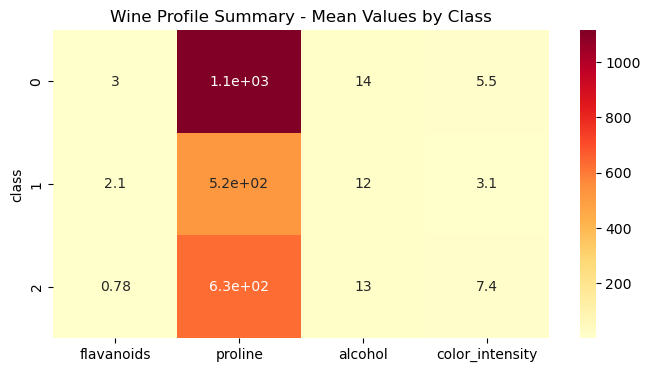

In [81]:
#Visualizamos la media de las características clave por clase utilizando un mapa de calor para identificar rápidamente las diferencias entre los tipos de vino.
summary_means = df.groupby("class")[["flavanoids","proline","alcohol","color_intensity"]].mean().round(2)

plt.figure(figsize=(8,4))
sns.heatmap(summary_means, annot=True, cmap="YlOrRd")
plt.title("Wine Profile Summary - Mean Values by Class")
plt.show()

## Perfil químico preliminar por clase

- **Clase 0**: Mayor concentración de flavonoides y proline, lo que sugiere un perfil fenólico más elevado.
- **Clase 1**: Perfil intermedio y más equilibrado en las variables analizadas.
- **Clase 2**: Menor contenido fenólico pero mayor intensidad de color.

Estas diferencias estructurales explican la alta separabilidad observada en el modelo de clasificación.

## Interpretación Enológica de las Clases

A partir del análisis químico:

- **Clase 0 – Perfil Estructurado y Fenólico**  
  Alta concentración de flavonoides y proline. Sugiere mayor cuerpo y complejidad estructural.

- **Clase 1 – Perfil Equilibrado**  
  Composición intermedia y menor intensidad cromática. Representa un perfil más balanceado.

- **Clase 2 – Perfil Intenso y Cromático**  
  Mayor intensidad de color y menor carga fenólica. Indica una expresión visual más marcada.

## Wine Profile Summary

El resumen estadístico confirma las diferencias estructurales observadas en el análisis visual y ANOVA:

- Clase 0 presenta los valores promedio más altos en flavanoides, prolina y alcohol, lo que refuerza su carácter estructurado y concentrado.

- Clase 1 muestra valores intermedios en todas las variables, representando un perfil más equilibrado.

- Clase 2 presenta menor concentración fenólica pero mayor intensidad cromática promedio.

Estos resultados cuantitativos respaldan la alta separabilidad observada en el modelo de clasificación.